In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

from scroutines import powerplots

In [2]:
outdir = "/data/qlyu/v1/results_merfish/plots_230621"
outdatadir = "/data/qlyu/v1/results_merfish"
!mkdir -p $outdir

In [3]:
f1 = '/data/qlyu/v1/data/merfish/merfish_06142023/pos/region1/cell_by_gene.csv'
f2 = '/data/qlyu/v1/data/merfish/merfish_06142023/pos/region1/cell_metadata.csv'
output = outdatadir + '/pos_reg1_230719.h5ad'

df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)

df1.shape, df2.shape

((378910, 551), (378910, 17))

In [4]:
!ls -alhtr "'/data/qlyu/v1/data/merfish/merfish_06142023/pos/region1/" 

ls: cannot access "'/data/qlyu/v1/data/merfish/merfish_06142023/pos/region1/": No such file or directory


In [5]:
genes = df1.iloc[:,1:-50].columns
blnks = df1.iloc[:, -50:].columns
df = df2.join(df1)
assert np.all(df['cell'] == df['EntityID'])
len(genes), len(blnks)

(500, 50)

In [6]:
# sns.histplot(df2['volume'], cumulative=True, element='step')

In [7]:
# sns.histplot(df1[blnks].sum(axis=1), cumulative=True, element='step')

<Axes: xlabel='gncov', ylabel='Count'>

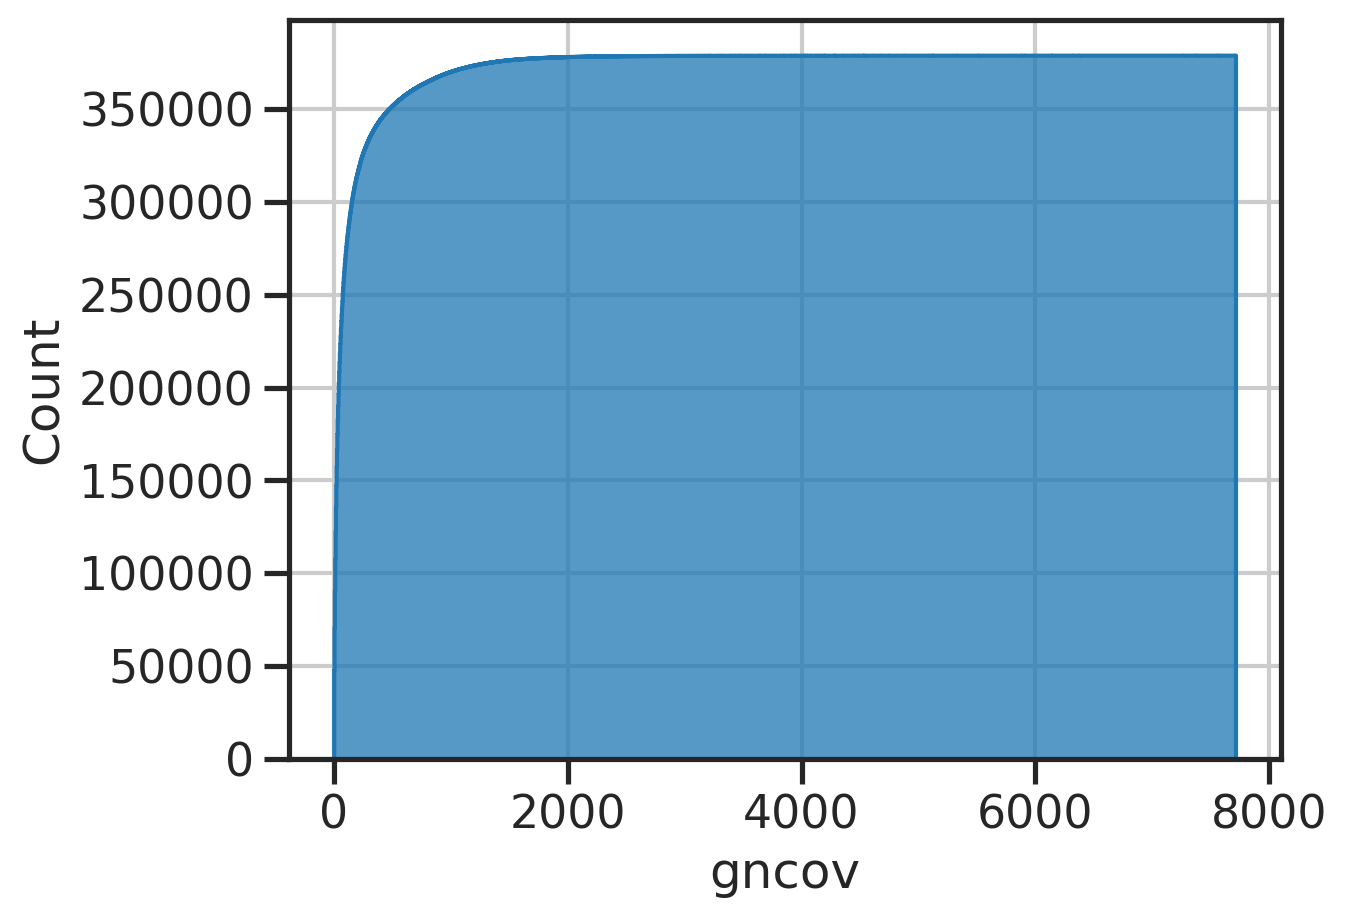

In [8]:
df['fpcov'] = df[blnks].sum(axis=1)
df['gncov'] = df[genes].sum(axis=1)
sns.histplot(df['gncov'], cumulative=True, element='step')

In [9]:
print(df.shape)
cond = np.all([
    df['volume'] < 5000, 
    df['fpcov'] < 5,
    df['gncov'] > 10,
], axis=0)

df = df[cond] 
print(df.shape)

(378910, 570)
(267095, 570)


In [10]:
# functions (the teacher wrote for you to use later)
def rot2d(x, y, theta, unit='degree'):
    """ rotate data points defined by `x` and `y` by `theta` degree
    """
    a = np.vstack([x,y]).T
    if unit == 'degree':
        theta = theta*np.pi/180 # convert to radian

    R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    ar = a.dot(R.T)
    return ar[:,0], ar[:,1]

def st_scatter(x, y, gexp=None, vmax_p=98, title='', s=1, cbar_label='', output='', cmap='rocket_r', axis_off=True):
    """customized scatter plot -- yesterday's progress
    """
  
    fig, ax = plt.subplots(figsize=(10,8))
    if gexp is not None:
        vmax = np.percentile(gexp, vmax_p)
        g = ax.scatter(x, y, c=gexp, s=s, edgecolor='none', vmax=vmax, cmap=cmap, rasterized=True)
        fig.colorbar(g, label=cbar_label, shrink=0.3)
    else:
        g = ax.scatter(x, y, s=s, edgecolor='none', cmap=cmap, rasterized=True)
  
    if axis_off:
        ax.axis('off')
    ax.set_title(title)
    ax.set_aspect('equal')
  
    if output:
        powerplots.savefig_autodate(fig, output)
        
    return 

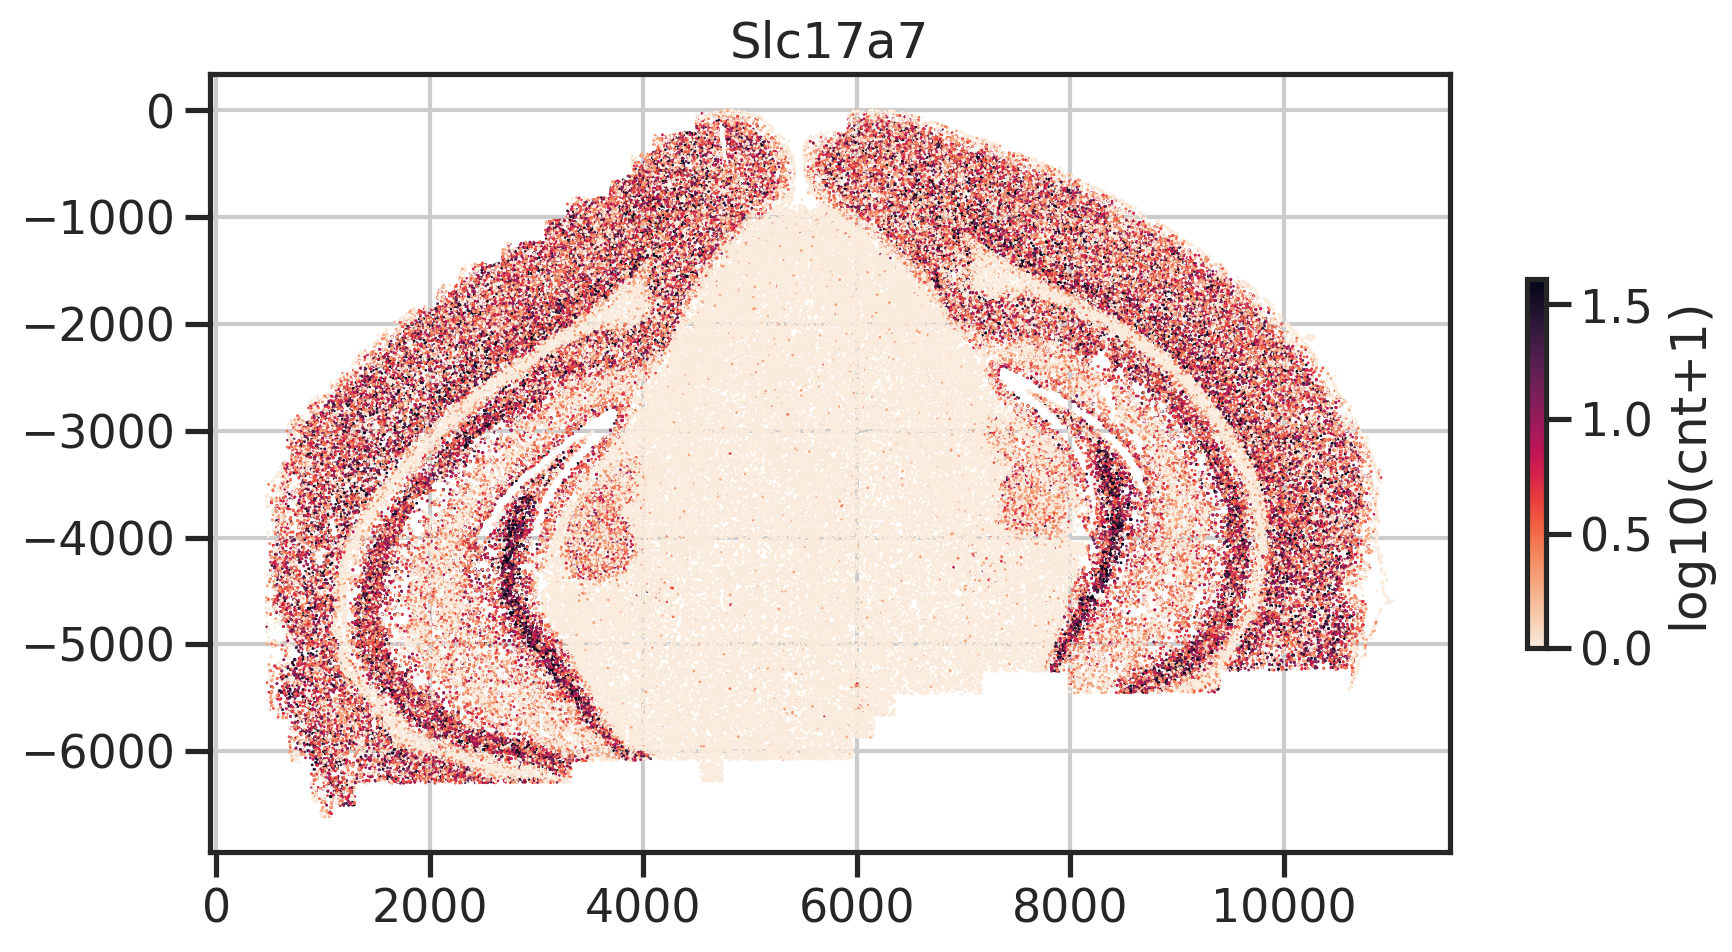

In [11]:
# calibrate coordinates

x = df['center_x']
y = df['center_y']
xr, yr = rot2d(x, y, 270)
df['x'] = xr
df['y'] = yr

gn = 'Slc17a7'
g = np.log10(1+df[gn])
st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', axis_off=False)

In [12]:
# focus on Visual cortex
cond_region = df['y'] > -4000
dfsub = df[cond_region]

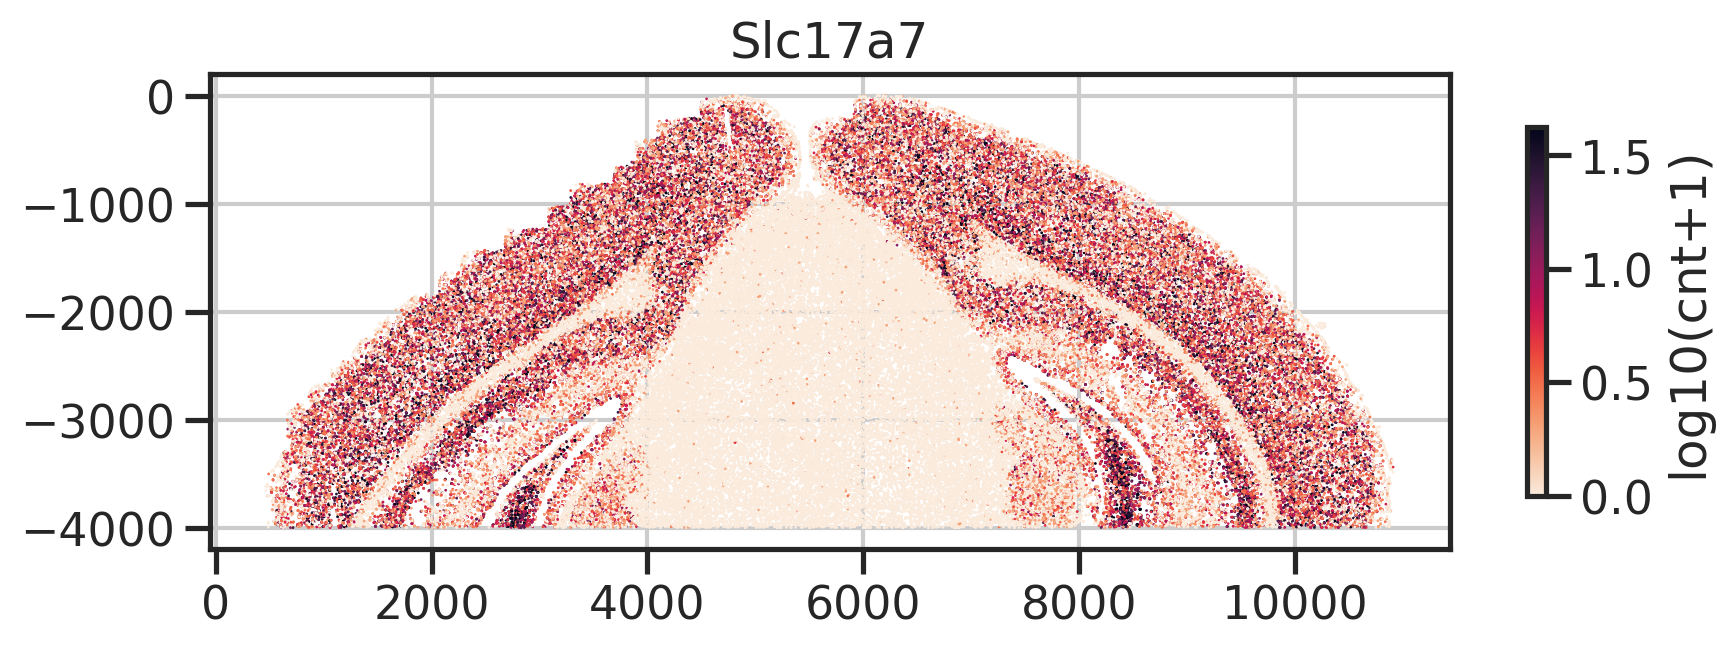

In [13]:
gn = 'Slc17a7'
g = np.log10(1+dfsub[gn])
xr = dfsub['x']
yr = dfsub['y']
st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', axis_off=False)

In [14]:
dfsub

,EntityID,fov,volume,center_x,center_y,min_x,min_y,max_x,max_y,anisotropy,...,Blank-45,Blank-46,Blank-47,Blank-48,Blank-49,Blank-50,fpcov,gncov,x,y
4,2596588900026100001,1283,135.844768,3477.036843,514.121018,3469.859803,509.542477,3484.705823,518.733934,1.598548,...,0,0,0,0,0,0,0,20,514.121018,-3477.036843
5,2596588900026100003,1283,144.819434,3470.659621,529.116920,3461.438134,522.638427,3478.383164,535.142047,2.696754,...,0,0,0,0,0,0,0,38,529.116920,-3470.659621
6,2596588900026100004,1283,459.491986,3475.026858,532.648165,3461.496649,522.019111,3485.057888,539.016178,1.926348,...,0,0,0,0,0,0,1,57,532.648165,-3475.026858
8,2596588900026100007,1283,718.567166,3426.814661,559.878893,3421.469658,552.167124,3430.775730,566.376386,1.530599,...,0,0,0,0,0,0,0,112,559.878893,-3426.814661
9,2596588900026100009,1283,1112.428203,3420.504294,567.107928,3410.848742,559.481144,3429.828770,576.721615,1.099409,...,1,0,0,0,0,0,1,76,567.107928,-3420.504294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374910,2596588904190100029,2485,388.024923,3989.796467,10874.546794,3977.239505,10855.986072,3998.933520,10886.950117,1.456055,...,0,0,0,0,0,0,0,67,10874.546794,-3989.796467
374912,2596588904190100031,2485,67.929045,3951.308089,10872.950151,3949.167687,10869.138860,3953.548625,10877.522222,1.956155,...,0,0,0,0,0,0,0,14,10872.950151,-3951.308089
374915,2596588904190100036,2485,715.560277,3967.493005,10867.613982,3957.900521,10855.315004,3978.911340,10877.560823,1.470465,...,0,0,0,0,0,0,0,76,10867.613982,-3967.493005
374916,2596588904190100037,2485,1553.772281,3990.409260,10873.444452,3980.796302,10855.103666,3999.955150,10884.902798,1.733681,...,0,0,0,0,0,0,0,110,10873.444452,-3990.409260


In [15]:
df2.columns

Index(['EntityID', 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'min_y',
       'max_x', 'max_y', 'anisotropy', 'transcript_count',
       'perimeter_area_ratio', 'solidity', 'DAPI_raw', 'DAPI_high_pass',
       'PolyT_raw', 'PolyT_high_pass'],
      dtype='object')

In [16]:
metacols = np.hstack(['x', 'y', 'gncov', 'fpcov', df2.columns])
adata = ad.AnnData(X=dfsub[genes].values, 
                   obs=dfsub[metacols], 
                   var=pd.DataFrame(index=genes), 
                   obsm=dict(blanks=dfsub[blnks].values),
                  )

/tmp/ipykernel_1716421/4156774178.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=dfsub[genes].values,
/home/qlyu/mambaforge/envs/bbbroutine/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [17]:
adata.write(output)

In [18]:
# for gn in genes:
#     g = np.log10(1+df[gn])
#     output = outdir + f'/{gn}.pdf'
#     print(output)
#     st_scatter(xr, yr, gexp=g, title=gn, cbar_label='log10(cnt+1)', output=output)
#     plt.close()
#     # break